<a href="https://colab.research.google.com/github/ni190304/DAV_44/blob/master/DAV_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 2:

# Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
len(df)

891

# Data Visualization

<Axes: xlabel='Pclass', ylabel='Count'>

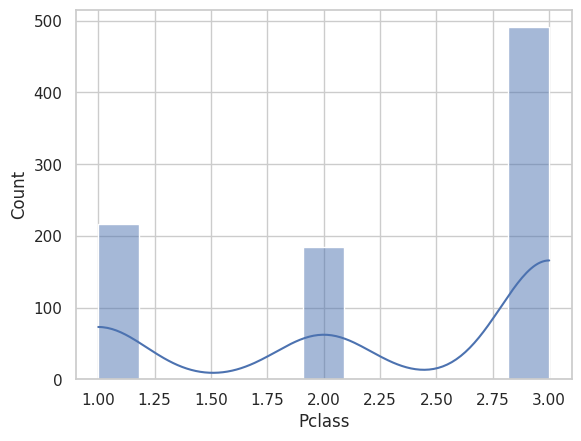

In [41]:
import seaborn as sns

sns.histplot(df['Pclass'], kde=True)

<Axes: ylabel='Frequency'>

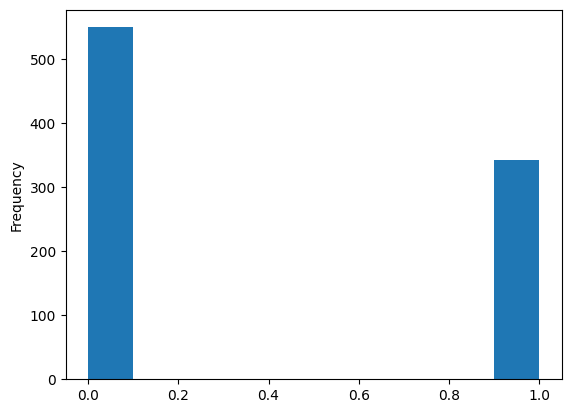

In [8]:
df["Survived"].plot.hist()

In [9]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

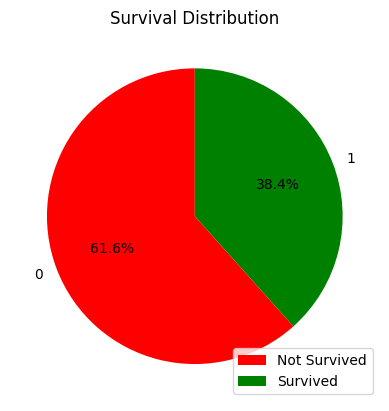

In [10]:
surv = {'Survived': df["Survived"]}

survived_counts = surv['Survived'].value_counts()

plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.legend(labels=survived_counts.index, loc='upper right')
plt.legend(['Not Survived', 'Survived'], loc='lower right')
plt.title('Survival Distribution')
plt.show()

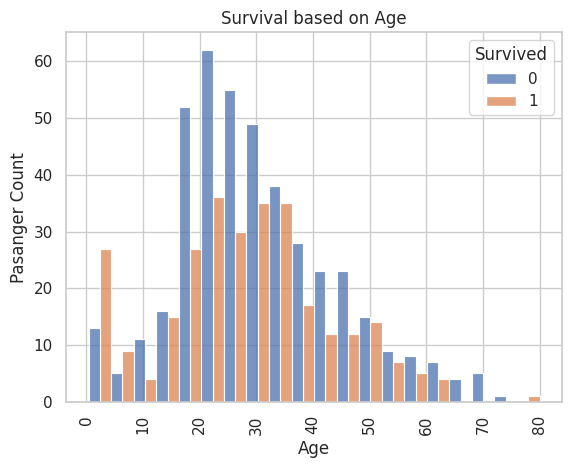

In [11]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.histplot( df, x="Age", hue="Survived", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Pasanger Count")
plt.title("Survival based on Age")
plt.show()

<ipython-input-12-33b2424ec162>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y= "Age" , inner='quartile', palette=colors)


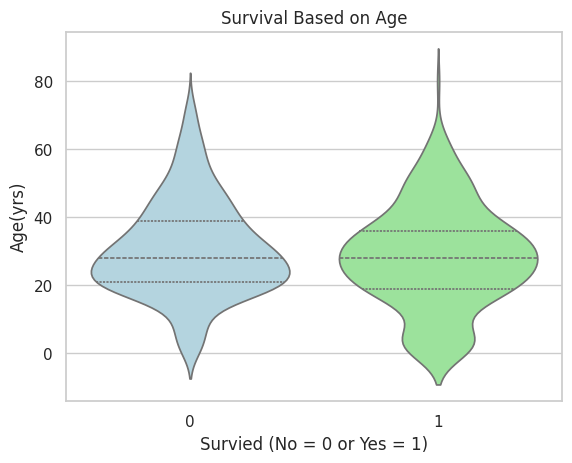

In [12]:
colors = ["lightblue", "lightgreen"]

sns.violinplot(data=df, x='Survived', y= "Age" , inner='quartile', palette=colors)
plt.title("Survival Based on Age")
plt.xlabel("Survied (No = 0 or Yes = 1)")
plt.ylabel("Age(yrs)")

plt.show()

In [13]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [14]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [15]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df["Sex"].cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [17]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            df[label] = content.fillna(content.median())

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content) and pd.isna(content).any():
        print(label)

Cabin
Embarked


In [20]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Modelling and Evaluation Metrics

In [22]:
X = df.drop("Survived",axis=1)

y = df["Survived"]

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1, random_state=42)

model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [25]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [26]:
y_preds = model.predict(X_test)
y_preds


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1])

In [27]:
np.array(y_test)


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1])

In [28]:
model.score(X_train, y_train)

0.7429775280898876

In [31]:
np.random.seed(42)

cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")

cv_prec = cross_val_score(model, X, y, cv=5, scoring="precision")

cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")

cv_mse  = cross_val_score(model, X, y, scoring="neg_mean_squared_error")

cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")

In [32]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_prec)*100:.2f}%")

# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

# Cross-validated MSE
print(f"The cross-validated MSE is: {np.mean(cv_mse)}")

# Cross-validated MAE
print(f"The cross-validated MAE is: {np.mean(cv_mae)}")


The cross-validated accuracy is: 73.97%
The cross-validated precision is: 72.32%
The cross-validated recall is: 52.08%
The cross-validated MSE is: -0.2603038101814073
The cross-validated MAE is: -0.2603038101814073


# R

In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’




In [2]:
library(ggplot2)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
data <- read.csv("/content/drive/MyDrive/Titanic-Dataset.csv")
head(data,5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


In [5]:
summary(data)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [6]:
data <- data[, -c(1,2,3,4,5,6,7,8,9)]

In [9]:
data <- data[, !colnames(data) %in% c("Cabin")]


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


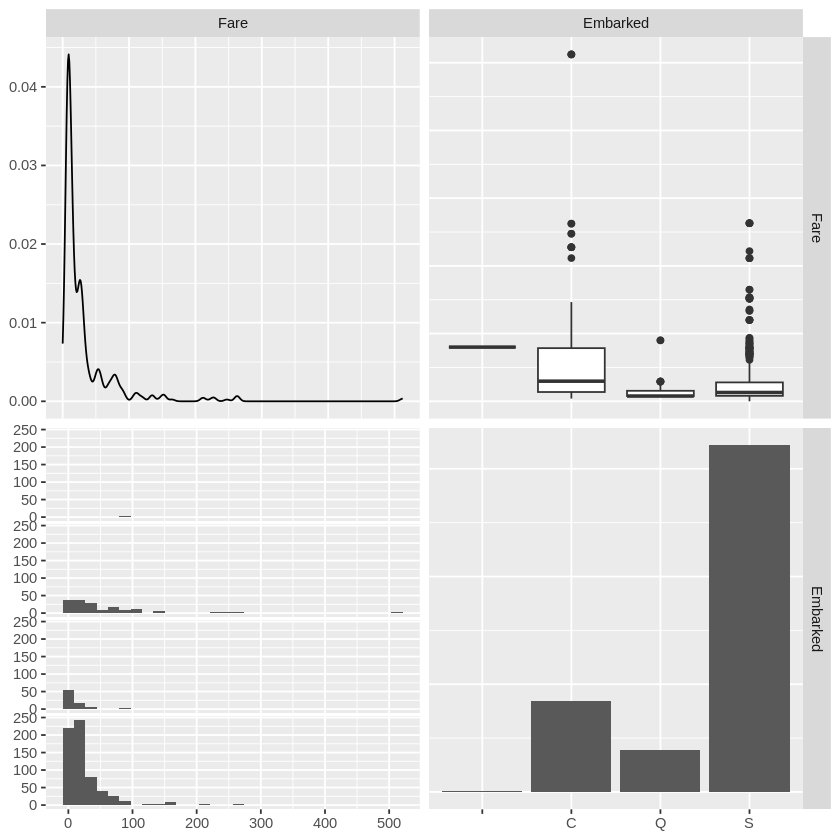

In [10]:
ggpairs(data, cardinality_threshold = 150)  # Adjust the threshold accordingly